In [118]:
!pip install pandas scikit-learn matplotlib                                                    

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # Corrected import statement
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [210]:
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx"

df = pd.read_excel(url)


df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [121]:
# Exploratory Data Analysis (EDA)

In [122]:
#Cheking columns
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [123]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (12690, 9)


In [211]:
df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

Rows & Columns after deleting the duiplicates : (12665, 9)


In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12665 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11665 non-null  object
 1   RESTAURANT_ID  12665 non-null  int64 
 2   CUISINES       12665 non-null  object
 3   TIME           12665 non-null  object
 4   CITY           12553 non-null  object
 5   LOCALITY       12567 non-null  object
 6   RATING         12663 non-null  object
 7   VOTES          11465 non-null  object
 8   COST           12665 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 989.5+ KB


In [182]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int32':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']

Number Data Type Columns are: 
 []


In [127]:
df.isnull().sum()

TITLE            1000
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [214]:
df['TITLE'].fillna('Unknown', inplace=True)

In [215]:
df['CITY'].fillna(df['CITY'].mode()[0], inplace=True)

In [216]:
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace=True)

In [217]:
df['RATING'].fillna(df['RATING'].median(), inplace=True)

In [218]:
df['VOTES'].fillna(df['VOTES'].median(), inplace=True)

In [219]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [142]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,17,49.0,1200
1,33,13198,289,6pm – 11pm (Mon-Sun),67,1046,23,30.0,1500
2,31,10915,2976,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,19,221.0,800
3,94,6346,4130,11:30am – 1am (Mon-Sun),222,136,22,24.0,800
4,50,15387,1766,11am – 1am (Mon-Sun),222,620,19,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,94,13228,2934,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,19,546.0,500
12686,33,9686,2143,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,24,1214.0,1800
12687,71,11133,2088,12noon – 12:30AM (Mon-Sun),239,1342,21,608.0,1300
12688,31,6134,3506,6am – 10:45pm (Mon-Sun),67,631,16,32.0,400


df['VOTES'] = df['VOTES'].str.extract('(\d+)').astype(float)

In [144]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,17,49.0,1200
1,33,13198,289,6pm – 11pm (Mon-Sun),67,1046,23,30.0,1500
2,31,10915,2976,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,19,221.0,800
3,94,6346,4130,11:30am – 1am (Mon-Sun),222,136,22,24.0,800
4,50,15387,1766,11am – 1am (Mon-Sun),222,620,19,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,94,13228,2934,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,19,546.0,500
12686,33,9686,2143,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,24,1214.0,1800
12687,71,11133,2088,12noon – 12:30AM (Mon-Sun),239,1342,21,608.0,1300
12688,31,6134,3506,6am – 10:45pm (Mon-Sun),67,631,16,32.0,400


In [145]:
df.drop('RESTAURANT_ID', axis=1, inplace=True)

In [146]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,17,49.0,1200
1,33,289,6pm – 11pm (Mon-Sun),67,1046,23,30.0,1500
2,31,2976,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,19,221.0,800
3,94,4130,11:30am – 1am (Mon-Sun),222,136,22,24.0,800
4,50,1766,11am – 1am (Mon-Sun),222,620,19,165.0,300
...,...,...,...,...,...,...,...,...
12685,94,2934,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,19,546.0,500
12686,33,2143,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,24,1214.0,1800
12687,71,2088,12noon – 12:30AM (Mon-Sun),239,1342,21,608.0,1300
12688,31,3506,6am – 10:45pm (Mon-Sun),67,631,16,32.0,400


In [130]:
categorical_cols = ['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING']

In [212]:
categorical_cols = ['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
        df[col] = le.fit_transform(df[col])

df


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,94,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,94,13228,2934,1144,131,342,19,1349,500
12686,33,9686,2143,1177,222,133,24,191,1800
12687,71,11133,2088,1137,239,1342,21,1428,1300
12688,31,6134,3506,1837,67,631,16,996,400


I think time column was not having the significant inpact so droping it for further analysis & prediction

In [220]:
df.drop(columns=['TIME'], inplace=True)


In [149]:
df

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,17,49.0,1200
1,33,289,67,1046,23,30.0,1500
2,31,2976,67,1101,19,221.0,800
3,94,4130,222,136,22,24.0,800
4,50,1766,222,620,19,165.0,300
...,...,...,...,...,...,...,...
12685,94,2934,131,342,19,546.0,500
12686,33,2143,222,133,24,1214.0,1800
12687,71,2088,239,1342,21,608.0,1300
12688,31,3506,67,631,16,32.0,400


In [150]:
df.describe(include="all").T  #Discribe function we get all type of values


,count,mean,std,min,25%,50%,75%,max
TITLE,12665.0,61.084485,34.691194,0.0,31.0,59.0,94.0,112.0
CUISINES,12665.0,2234.911409,1204.134826,0.0,1185.0,2413.0,3223.0,4154.0
CITY,12665.0,144.787051,86.001570,0.0,67.0,131.0,222.0,359.0
LOCALITY,12665.0,660.783261,403.726799,0.0,337.0,590.0,1011.0,1416.0
RATING,12665.0,18.794473,6.183369,0.0,16.0,19.0,22.0,32.0
VOTES,12665.0,391.686775,805.772327,4.0,63.0,163.0,405.0,41186.0
COST,12665.0,655.400790,627.389831,20.0,300.0,500.0,800.0,14000.0


In [152]:
# Explore summary statistics for numerical columns
for col in numerical_cols:
    print(col)
    print("Mean:", df[col].mean())
    print("Standard Deviation:", df[col].std())
    print("Minimum:", df[col].min())
    print("25th Percentile:", df[col].quantile(0.25))
    print("Median:", df[col].median())
    print("75th Percentile:", df[col].quantile(0.75))
    print("Maximum:", df[col].max())
    print("="*50)

TITLE
Mean: 61.084484800631664
Standard Deviation: 34.69119433072829
Minimum: 0
25th Percentile: 31.0
Median: 59.0
75th Percentile: 94.0
Maximum: 112
CUISINES
Mean: 2234.9114093959734
Standard Deviation: 1204.1348264390035
Minimum: 0
25th Percentile: 1185.0
Median: 2413.0
75th Percentile: 3223.0
Maximum: 4154
CITY
Mean: 144.78705092775365
Standard Deviation: 86.00157039415836
Minimum: 0
25th Percentile: 67.0
Median: 131.0
75th Percentile: 222.0
Maximum: 359
LOCALITY
Mean: 660.7832609553889
Standard Deviation: 403.7267987395424
Minimum: 0
25th Percentile: 337.0
Median: 590.0
75th Percentile: 1011.0
Maximum: 1416
RATING
Mean: 18.794472956968022
Standard Deviation: 6.183368847846097
Minimum: 0
25th Percentile: 16.0
Median: 19.0
75th Percentile: 22.0
Maximum: 32
VOTES
Mean: 391.68677457560204
Standard Deviation: 805.772326725694
Minimum: 4.0
25th Percentile: 63.0
Median: 163.0
75th Percentile: 405.0
Maximum: 41186.0


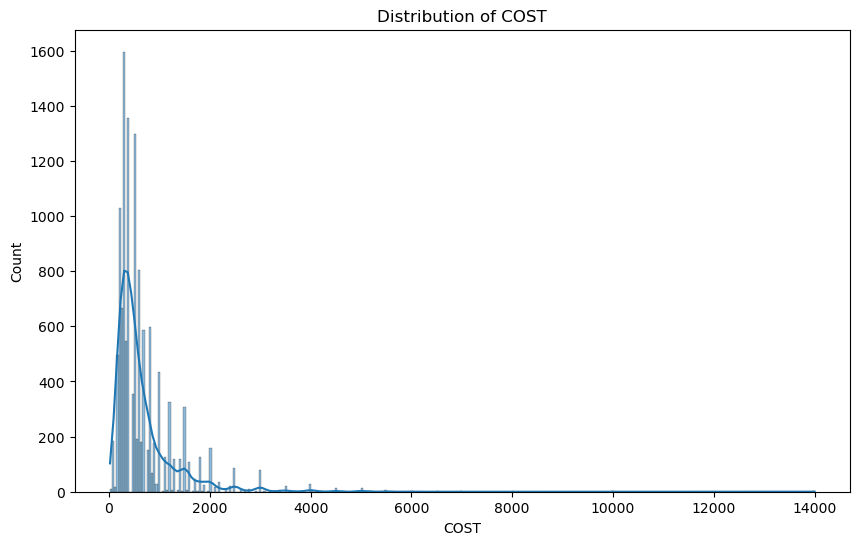

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(df['COST'], kde=True)
plt.title('Distribution of COST')
plt.show()

0.0036417859025753415


<Axes: xlabel='TITLE', ylabel='Density'>

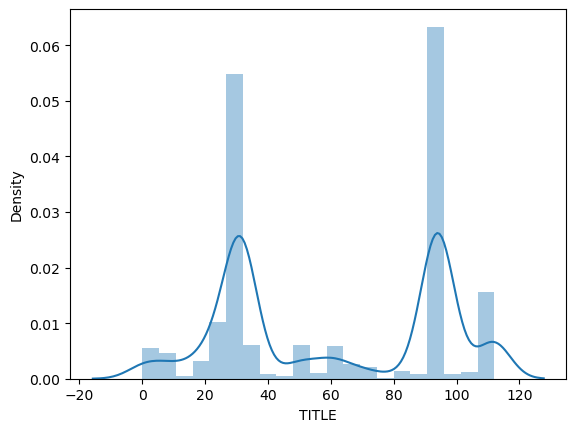

In [155]:
print(df['TITLE'].skew())
sns.distplot(df['TITLE'],kde=True)

-0.21831150880760267


<Axes: xlabel='CUISINES', ylabel='Density'>

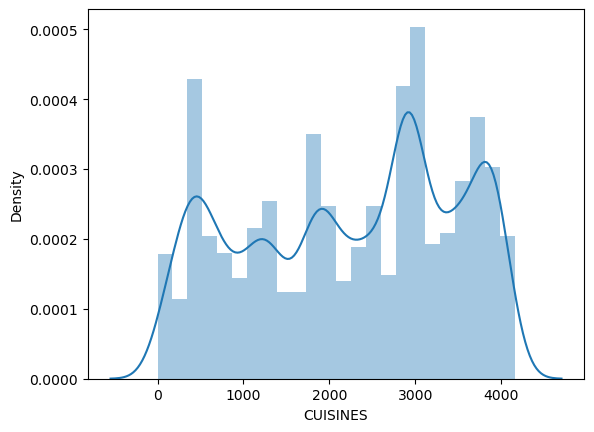

In [156]:
print(df['CUISINES'].skew())
sns.distplot(df['CUISINES'],kde=True)

0.3061437781227051


<Axes: xlabel='CITY', ylabel='Density'>

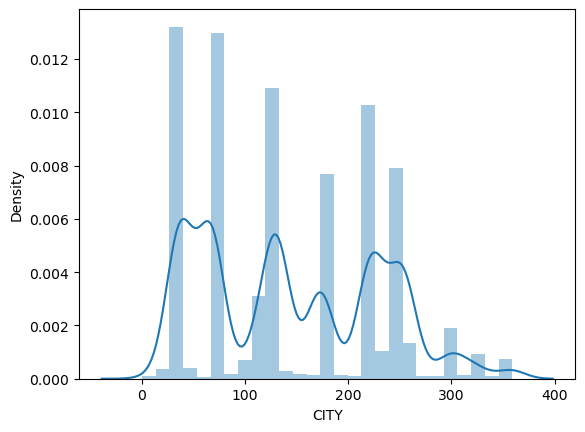

In [157]:
print(df['CITY'].skew())
sns.distplot(df['CITY'],kde=True)

0.33453600256366645


<Axes: xlabel='LOCALITY', ylabel='Density'>

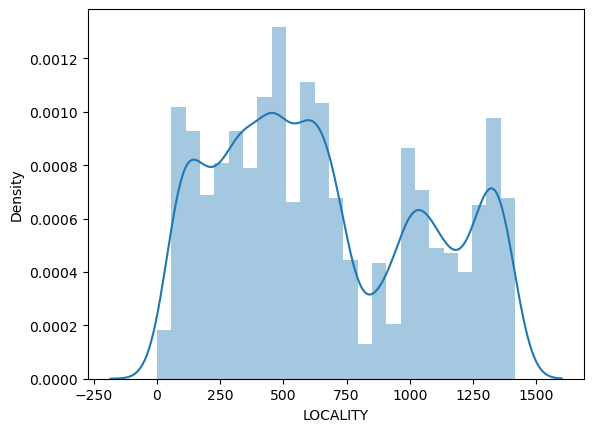

In [158]:
print(df['LOCALITY'].skew())
sns.distplot(df['LOCALITY'],kde=True)

-0.8018356905387906


<Axes: xlabel='RATING', ylabel='Density'>

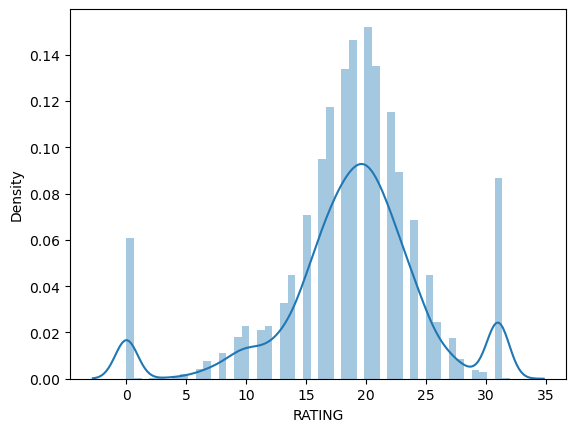

In [159]:
print(df['RATING'].skew())
sns.distplot(df['RATING'],kde=True)

14.783453135452806


<Axes: xlabel='VOTES', ylabel='Density'>

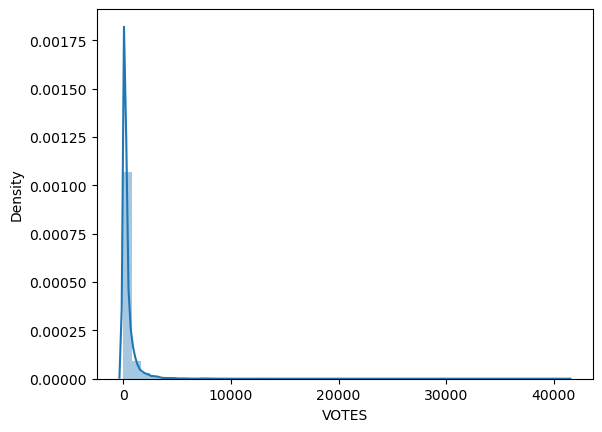

In [160]:
print(df['VOTES'].skew())
sns.distplot(df['VOTES'],kde=True)

In [ ]:
['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES']

<Axes: xlabel='RATING', ylabel='VOTES'>

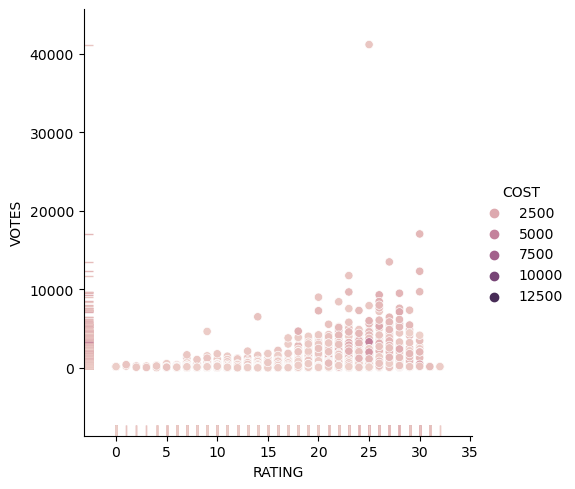

In [164]:
sns.relplot(data=df, x='RATING', y='VOTES', hue='COST')
sns.rugplot(data=df, x='RATING', y='VOTES', hue='COST', legend=False)

<Axes: xlabel='RATING', ylabel='CITY'>

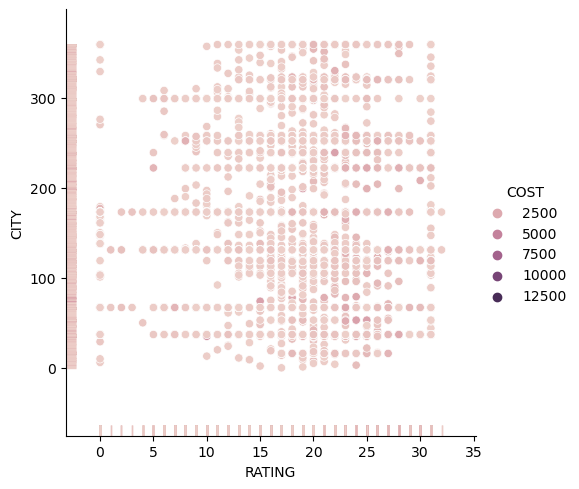

In [166]:
sns.relplot(data=df, x='RATING', y='CITY', hue='COST')
sns.rugplot(data=df, x='RATING', y='CITY', hue='COST', legend=False)

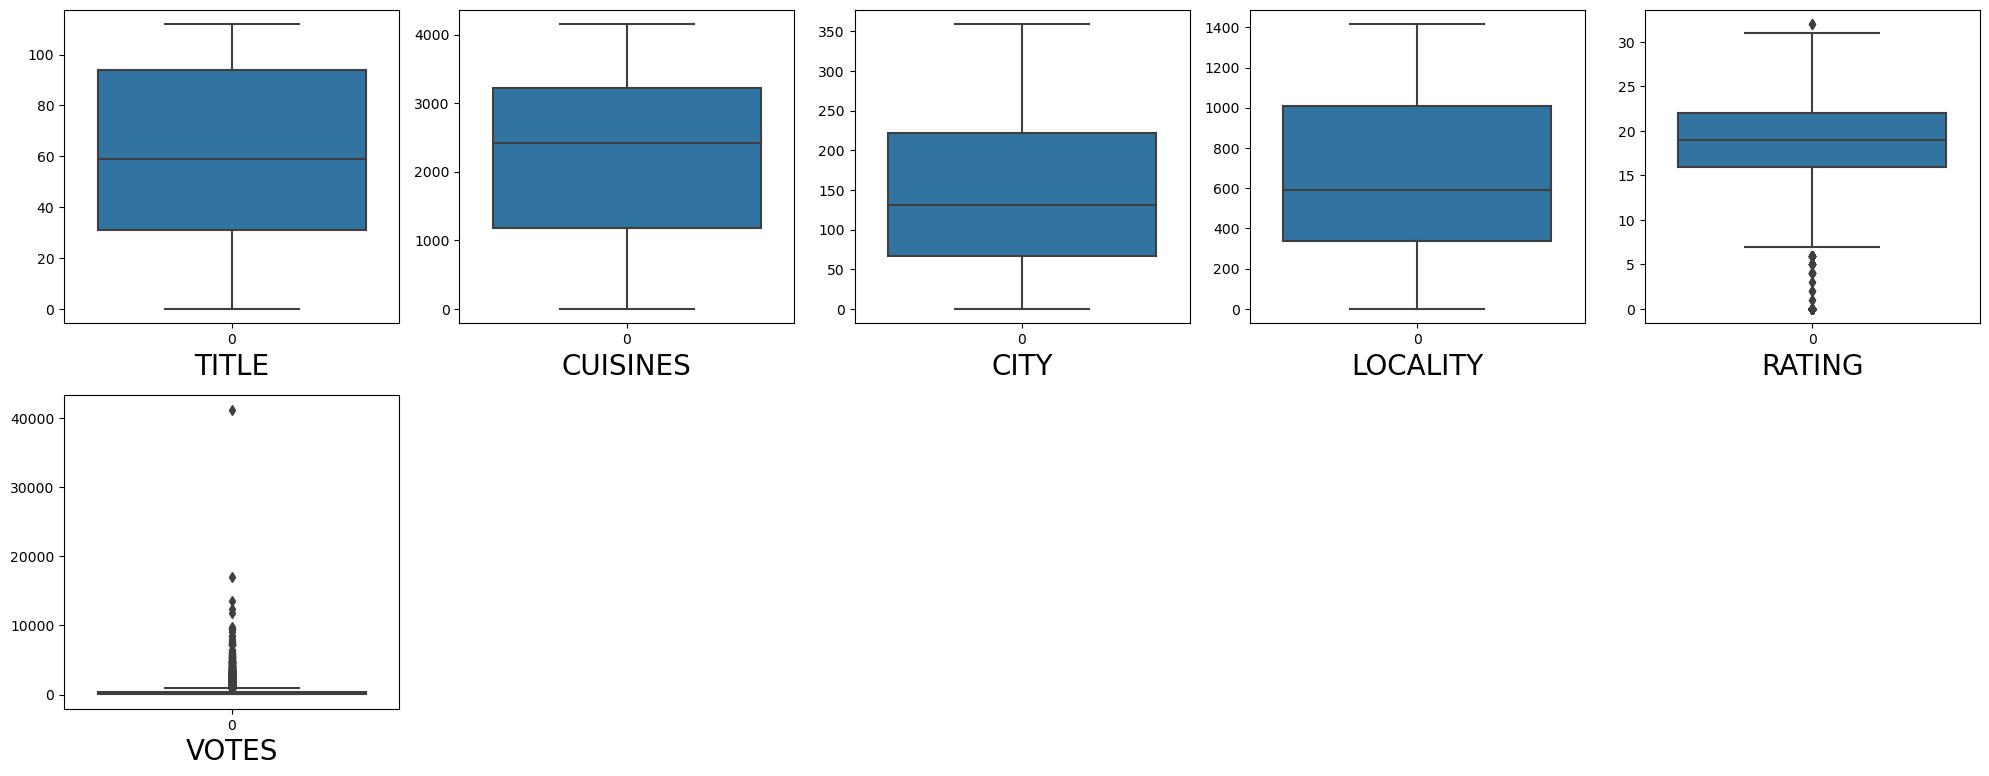

In [167]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number = 1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
    
plt.tight_layout()

With the usage of box plot we tried  to check for outliers in our continous data columns and we found no outliers in them  

In [168]:
df.skew()

TITLE        0.003642
CUISINES    -0.218312
CITY         0.306144
LOCALITY     0.334536
RATING      -0.801836
VOTES       14.783453
COST         3.978358
dtype: float64

With the skew method we see that there are column present in our data set that are above the aceptable range of +/-0.5 value however most of those are Categorical columns and do not worry about outliers or skewness in catagorical data therefore we will ignore having said that the skewness that is present 
In our continous data columns in catagorical column we wont have to fix any other concern in our dataset. 

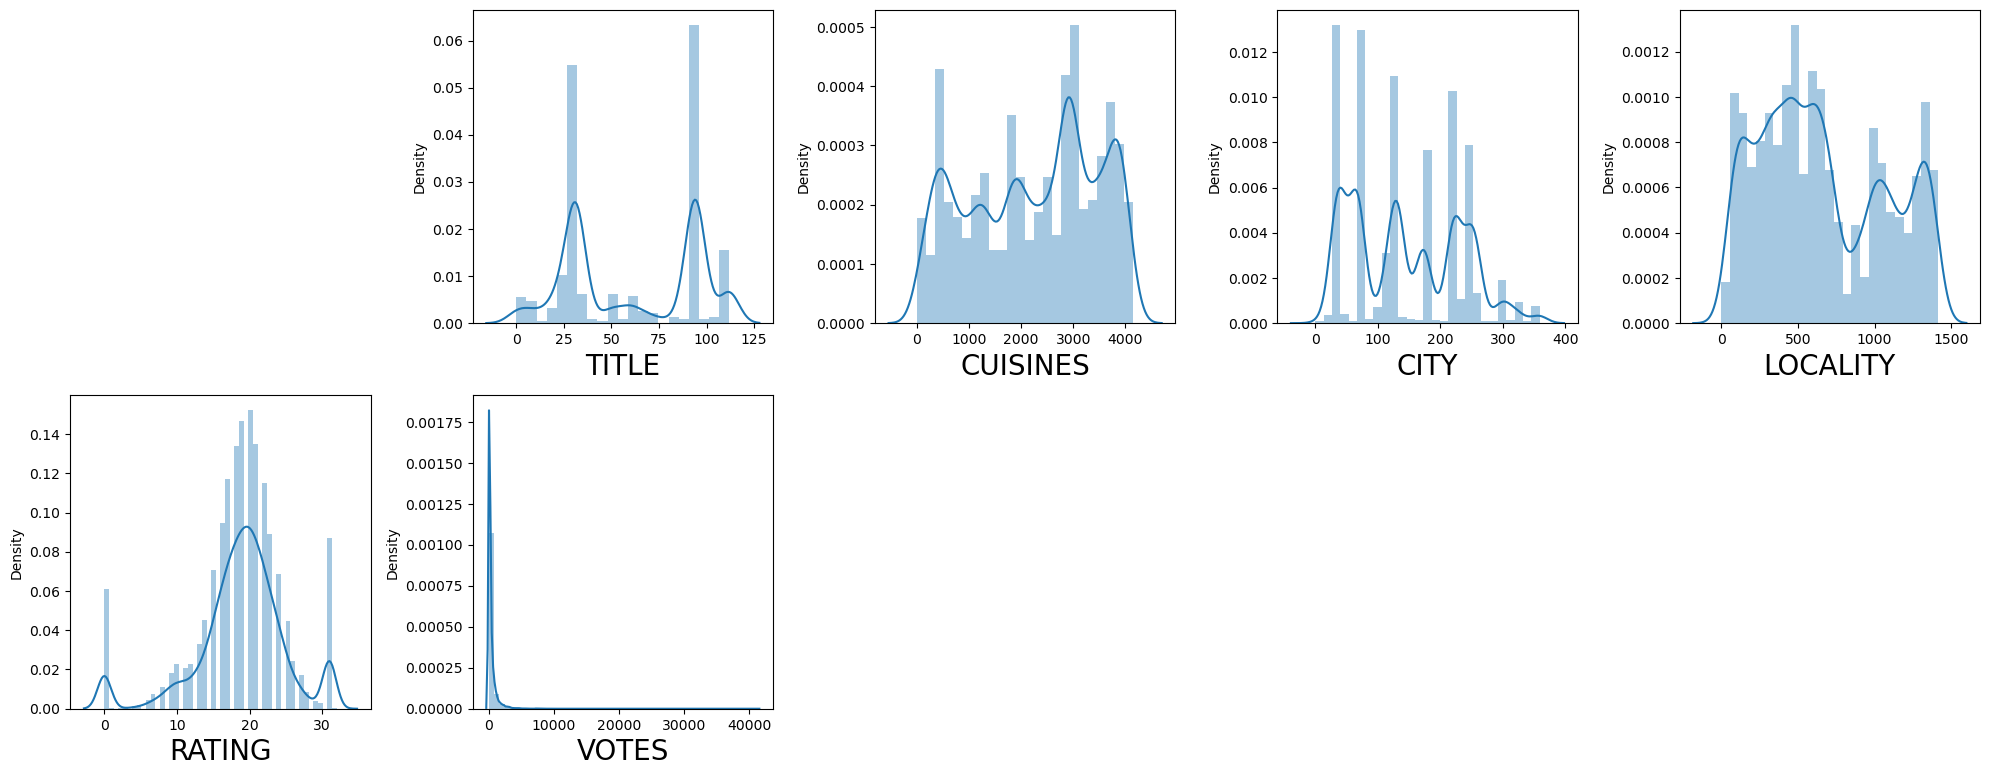

In [169]:
plt.figure(figsize=(20,15),facecolor='white')
plot_numbers=1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
plt.tight_layout()    
        

In the above distribution  plot we can see that our continous data columns have some skewness that will need to be treated and reduced  to cover up an 
acceptable range in data values.

import numpy as np
from scipy.stats import boxcox

positively_skewed_columns = ['CITY', 'LOCALITY', 'VOTES', 'COST']

for col in positively_skewed_columns:
    if (df[col] > 0).all():  # Check for zero or negative values
        df[col] = np.log1p(df[col])  # Use np.log1p to handle zero values

for col in positively_skewed_columns:
    if (df[col] > 0).all():  # Check for zero or negative values
        transformed_data, _ = boxcox(df[col])
        df[col] = transformed_data


negative_skew_columns=['CUISINES' ,'RATING']

for col in negative_skew_columns:
    if df[col].skew() < 0:  # Check for negative skewness
        df[col] = np.sqrt(df[col])

# Check skewness after transformation
skewness_after = df[negative_skew_columns].skew()

In [189]:
df.skew()

TITLE            0.003642
RESTAURANT_ID    0.007317
CUISINES        -0.218312
TIME             0.305681
CITY             0.267921
LOCALITY         0.352353
RATING          -0.801836
VOTES           -0.195973
COST             3.978358
dtype: float64

Here we have handle the skewness in continous data

array([[<Axes: title={'center': 'TITLE'}>,
        <Axes: title={'center': 'RESTAURANT_ID'}>,
        <Axes: title={'center': 'CUISINES'}>],
       [<Axes: title={'center': 'TIME'}>,
        <Axes: title={'center': 'CITY'}>,
        <Axes: title={'center': 'LOCALITY'}>],
       [<Axes: title={'center': 'RATING'}>,
        <Axes: title={'center': 'VOTES'}>,
        <Axes: title={'center': 'COST'}>]], dtype=object)

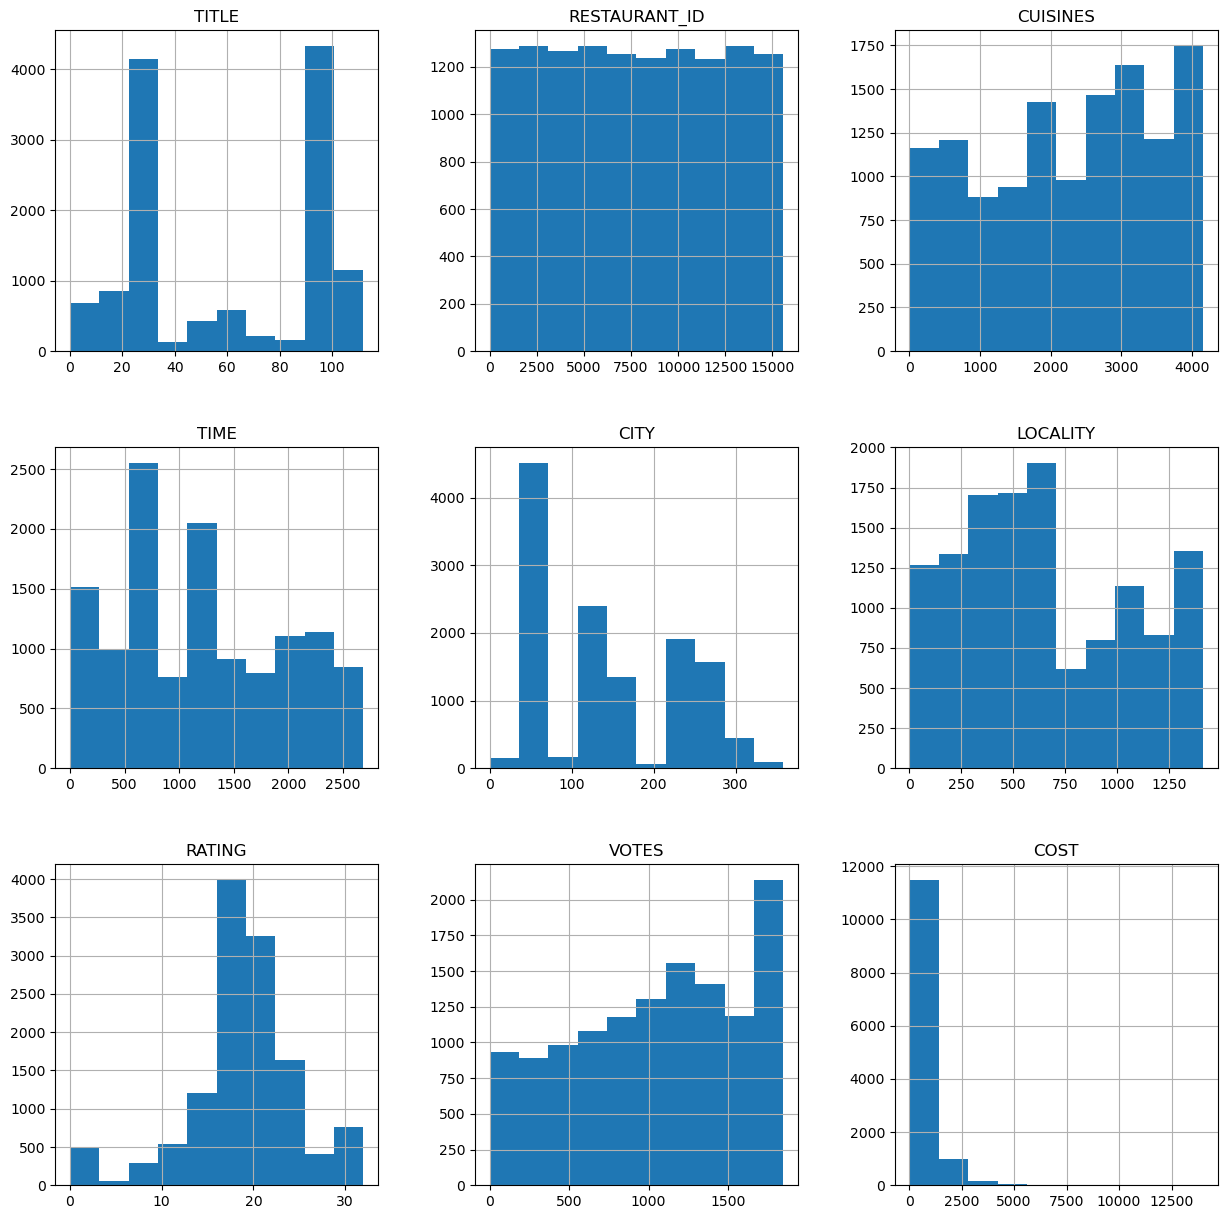

In [190]:
df.hist(figsize=(15,15))

I have generated a histogram for all our dataset columns after applying encoading technique & converting all object datatype columns to numeric datatype values 

In [191]:
df.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.003800,0.234432,0.057333,-0.006016,0.025363,-0.023292,0.027652,-0.266244
RESTAURANT_ID,0.003800,1.000000,0.056058,0.008395,0.005024,-0.004125,0.033554,0.002980,0.041106
CUISINES,0.234432,0.056058,1.000000,0.105406,0.024053,0.017477,-0.039251,-0.003018,-0.014286
TIME,0.057333,0.008395,0.105406,1.000000,-0.011128,-0.008233,-0.034457,0.031470,0.018302
CITY,-0.006016,0.005024,0.024053,-0.011128,1.000000,0.043058,0.025978,0.038031,0.044804
LOCALITY,0.025363,-0.004125,0.017477,-0.008233,0.043058,1.000000,-0.023736,0.007212,-0.015208
RATING,-0.023292,0.033554,-0.039251,-0.034457,0.025978,-0.023736,1.000000,-0.019142,0.236880
VOTES,0.027652,0.002980,-0.003018,0.031470,0.038031,0.007212,-0.019142,1.000000,-0.058080
COST,-0.266244,0.041106,-0.014286,0.018302,0.044804,-0.015208,0.236880,-0.058080,1.000000


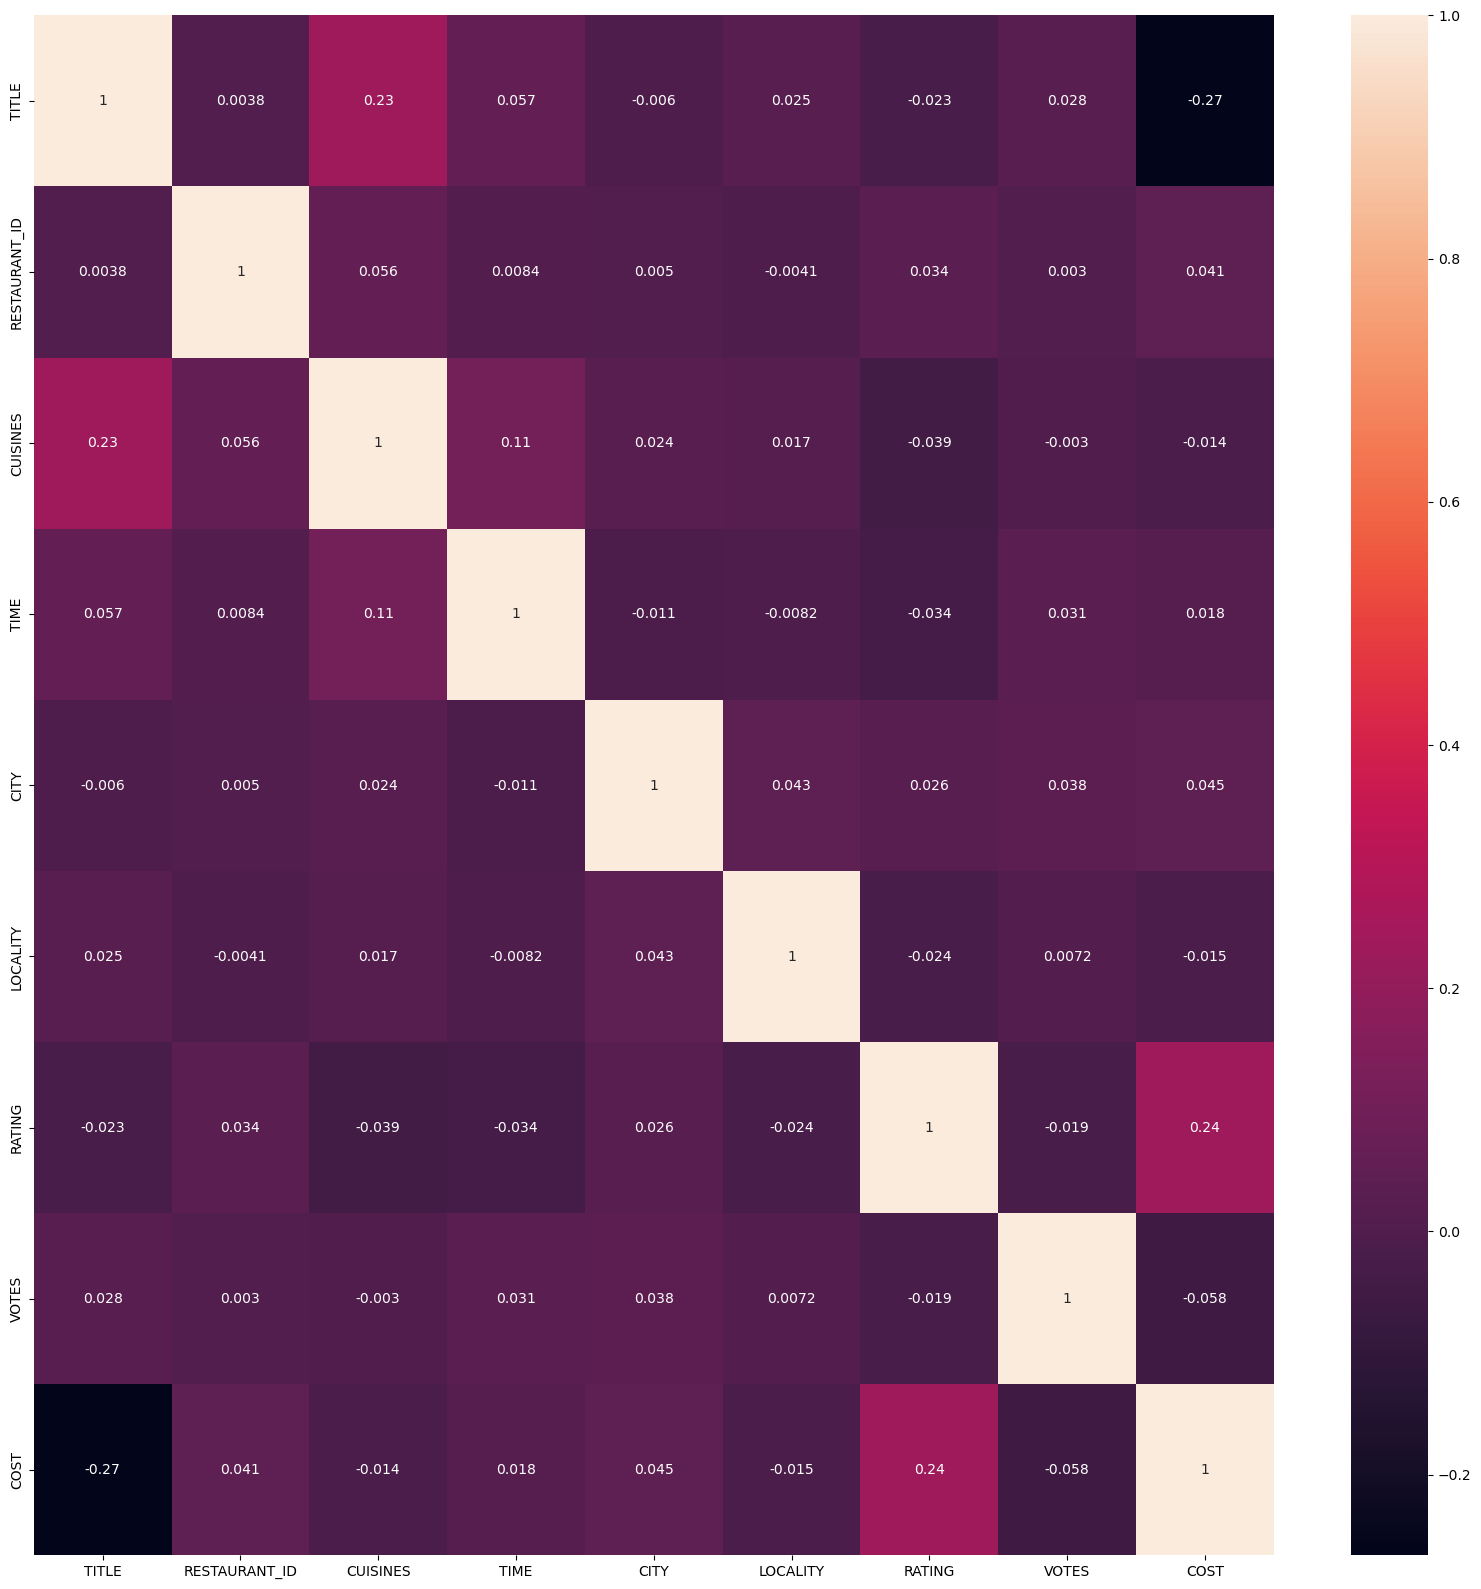

In [192]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Positive Correlation:- A correlation of +1 indicates a perfect positive correlation meaning that both variables move in the same direction together
Negative Correlation:- A Correlation of -1 indicates a perfect negative correlation meaning that as one variable goes up, the other goes down

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns. 

# Correlation Bar Plot Comparing features with our lable

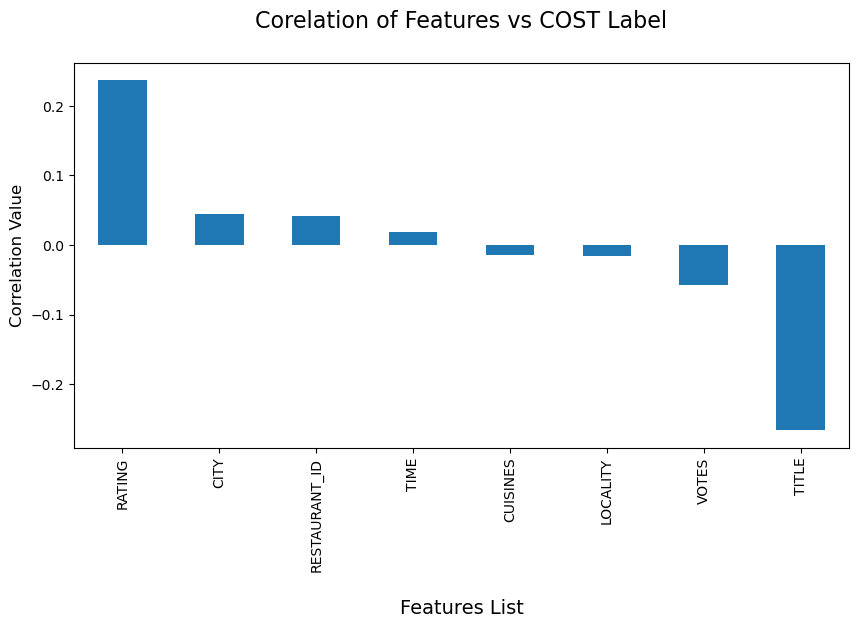

In [193]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['COST'].sort_values(ascending=False).drop('COST').plot.bar()
plt.title("Corelation of Features vs COST Label\n", fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Splitting the data set into 2 vaiables namely x & y for feture & label 

In [221]:
x = df.drop('COST',axis=1)

x

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,31,9438,2627,320,285,17,1278
1,33,13198,289,67,1046,23,950
2,31,10915,2976,67,1101,19,712
3,94,6346,4130,222,136,22,787
4,50,15387,1766,222,620,19,470
...,...,...,...,...,...,...,...
12685,94,13228,2934,131,342,19,1349
12686,33,9686,2143,222,133,24,191
12687,71,11133,2088,239,1342,21,1428
12688,31,6134,3506,67,631,16,996


In [222]:
y = df['COST']

y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12665, dtype: int64

In [223]:
x.shape

(12665, 7)

In [224]:
y.shape

(12665,)

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [235]:
x_train.shape

(8865, 7)

In [227]:
x_test.shape

(3800, 7)

In [236]:
y_train.shape

(8865,)

In [229]:
y_test.shape

(3800,)

In [247]:
from sklearn.ensemble import RandomForestRegressor  # Add this import statement
from sklearn.metrics import mean_squared_error, r2_score

x = df.drop('COST', axis=1)
y = df['COST']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Using RandomForestRegressor instead of LinearRegression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Making predictions
pred = rf_model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, pred)
r_squared = r2_score(y_test, pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 128626.88047168421
R-squared: 0.6981725324393167


In [249]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_rf_model = random_search.best_estimator_

# Make predictions
pred = best_rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
r_squared = r2_score(y_test, pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Mean Squared Error: 131924.52649669338
R-squared: 0.6904344908651903


In [250]:
from sklearn.linear_model import LinearRegression

In [251]:
lr=LinearRegression()

In [252]:
lr.fit(x_train,y_train)

LinearRegression()

In [253]:
lr.score(x_train,y_train)

0.1395571617601934

In [254]:
lr.coef_

array([-5.04092780e+00,  3.89720814e-03,  2.56471244e-02,  2.45867787e-01,
       -4.45855673e-03,  2.33484646e+01, -6.44139501e-02])

In [255]:
lr.intercept_

468.8862637616049

In [256]:
pred = lr.predict(x_test)

In [257]:
x_test

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
683,105,8982,2746,252,661,20,637
4905,31,11402,3532,299,1321,20,620
9970,31,3226,2850,131,54,18,972
4413,50,4458,1797,67,384,26,443
6505,60,13253,2424,67,633,25,1643
...,...,...,...,...,...,...,...
3846,112,12736,3801,131,628,9,1749
4032,112,6566,2946,258,1136,23,1440
1659,31,6011,3511,173,484,14,1528
6525,31,746,2658,252,553,21,827


In [258]:
print("All the predicted values and actual values are: ",pred,y_test)

All the predicted values and actual values are:  [529.9697531  942.29646962 787.91412061 ... 694.92184769 880.23539544
 440.96889855] 683       300
4905      500
9970      600
4413     1300
6505     5500
         ... 
3846      250
4032      400
1659      500
6525     1800
11424     300
Name: COST, Length: 3800, dtype: int64


In [259]:
lr.score(x_test,y_test)

0.11526975286383534

In [260]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

377036.89683307975


In [261]:
y_test

683       300
4905      500
9970      600
4413     1300
6505     5500
         ... 
3846      250
4032      400
1659      500
6525     1800
11424     300
Name: COST, Length: 3800, dtype: int64

In [296]:
df_test = pd.read_excel('Data_Test.xlsx')

df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [297]:
print("The shape of dataset is :",df.shape)

df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

The shape of dataset is : (12665, 8)
Rows & Columns after deleting the duiplicates : (12665, 8)


In [267]:
#Cheking columns
df_test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [307]:
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [299]:
df_test['TITLE'].fillna('Unknown', inplace=True)

In [300]:
df_test['CITY'].fillna(df['CITY'].mode()[0], inplace=True)

In [301]:
df_test['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace=True)

In [302]:
df_test['RATING'].fillna(df['RATING'].median(), inplace=True)

In [303]:
df_test['VOTES'].fillna(df['VOTES'].median(), inplace=True)

In [304]:
df_test['VOTES'] = df_test['VOTES'].str.extract('(\d+)').astype(float)


In [306]:
df_test['VOTES'].fillna(df['VOTES'].median(), inplace=True)

In [285]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0
3,Unknown,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0
4227,Unknown,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,1100.0


In [289]:
for col in categorical_cols:
    print(col, df_test[col].apply(type).unique())


TITLE [<class 'int'>]
CUISINES [<class 'int'>]
CITY [<class 'str'> <class 'numpy.int32'>]
LOCALITY [<class 'str'> <class 'numpy.int32'>]
RATING [<class 'str'> <class 'float'>]


In [290]:
df_test[col] = df_test[col].astype(str)


In [293]:
df

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,320,285,17,1278,1200
1,33,13198,289,67,1046,23,950,1500
2,31,10915,2976,67,1101,19,712,800
3,94,6346,4130,222,136,22,787,800
4,50,15387,1766,222,620,19,470,300
...,...,...,...,...,...,...,...,...
12685,94,13228,2934,131,342,19,1349,500
12686,33,9686,2143,222,133,24,191,1800
12687,71,11133,2088,239,1342,21,1428,1300
12688,31,6134,3506,67,631,16,996,400


In [310]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350.0
3,Unknown,204,Biryani,Faridabad,NIT,3.8,1445.0
4,QUICK BITES,13453,"South Indian, Kerala",Kochi,Kaloor,3.6,23.0
...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287.0
4227,Unknown,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469.0
4228,QUICK BITES,8617,"Continental, North Indian",Faridabad,Sector 86,3.7,53.0
4229,QUICK BITES,6485,"Rolls, Beverages",Kochi,Kochi,-,1100.0


In [312]:
categorical_cols = ['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    # Convert all values to strings before applying LabelEncoder
    df_test[col] = df_test[col].astype(str)
    df_test[col] = le.fit_transform(df_test[col])

df_test


,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,16,4085,328,111,663,24,564.0
1,72,12680,705,97,222,23,61.0
2,16,1411,508,97,412,19,350.0
3,84,204,849,42,457,19,1445.0
4,72,13453,710,79,301,17,23.0
...,...,...,...,...,...,...,...
4226,16,9057,475,109,598,20,287.0
4227,84,1247,914,10,238,24,469.0
4228,72,8617,1371,42,697,18,53.0
4229,72,6485,604,79,333,0,1100.0


In [309]:
df_test.drop('TIME', axis=1, inplace=True)

In [314]:
# Standardize features
X_test_scaled = scaler.transform(df_test)

NameError: name 'scaler' is not defined

In [316]:
from sklearn.preprocessing import StandardScaler

# Define StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data
scaler.fit(x_train)

# Standardize features in df_test
X_test_scaled = scaler.transform(df_test)

# Make predictions using the trained Random Forest model
predictions = best_rf_model.predict(X_test_scaled)

# Display the predictions
predictions


array([373.14262128, 373.14262128, 373.14262128, ..., 373.14262128,
       373.14262128, 373.14262128])

In [317]:
# Make predictions on the test dataset using the trained model
y_pred_test = lr.predict(X_test_scaled)


In [318]:
y_pred_test

array([495.03260829, 483.14618629, 476.06071367, ..., 464.03406885,
       395.73754819, 463.90915442])

# Save predictions for submission

In [319]:
# Assuming 'predictions' contains your predicted COST values
submission_df = pd.DataFrame({'COST': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_test.csv', index=False)
